# Tarea DT y GNB
##### Hinara Pastora Sánchez Mata

#### Introducción a la inteligencia artificial 2024-01

## Explicación de los datos

- CMPLNT_NUM: Número de queja (ID del incidente).
- CMPLNT_FR_DT y CMPLNT_FR_TM: Fecha y hora en que se reportó inicialmente el incidente.
- CMPLNT_TO_DT y CMPLNT_TO_TM: Fecha y hora en que finalizó el incidente (si aplica).
- RPT_DT: Fecha en que el incidente fue reportado a la policía.
- KY_CD: Código de la categoría del delito.
- OFNS_DESC: Descripción del delito.
- PD_CD: Código de la policía para el delito.
- PD_DESC: Descripción del código de la policía para el delito.
- CRM_ATPT_CPTD_CD: Indica si el crimen fue completado o solo fue un intento.
- LAW_CAT_CD: Categoría de la ley (p.ej., Felonía, Delito menor, Violación).
- JURIS_DESC: Descripción de la jurisdicción.
- BORO_NM: Nombre del distrito o barrio (Bronx, Brooklyn, Manhattan, etc.).
- LOC_OF_OCCUR_DESC: Descripción de la ubicación del incidente.
- PREM_TYP_DESC: Tipo de ubicación (p.ej., Residencia, Calle).
- Latitude y Longitude: Coordenadas geográficas del incidente.
- Lat_Lon: Coordenadas combinadas en un solo campo.

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

plt.style.use('ggplot')

## Lectura de datos

Se comienza cargando un conjunto de datos desde un archivo CSV llamado 'Taller5_2_Modificada.csv' en un dataframe utilizando la biblioteca pandas. A continuación, los datos se mezclan aleatoriamente (sample(frac=1)) para asegurar que no haya ningún orden o sesgo en los datos antes de utilizarlos en un modelo. Luego, se seleccionan las características (X) y la variable objetivo (y) para el análisis. En este caso, todas las columnas excepto 'LAW_CAT_CD' se utilizan como características (X), mientras que 'LAW_CAT_CD' se establece como la variable objetivo que se desea predecir.

In [16]:
# Cargar datos
dataframe = pd.read_csv('Taller5_2_Modificada.csv')

# Mezclar datos
dataframe = dataframe.sample(frac=1).reset_index(drop=True)

# Seleccionar las características (X) y la variable objetivo (y)
# Queremos predecir el tipo de delito 'KY_CD'
X = dataframe.drop(['LAW_CAT_CD'], axis=1)
y = dataframe['LAW_CAT_CD']


display(X, y)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,602607362,09/24/2016,19:08:00,09/24/2016,19:10:00,09/30/2016,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,14,INSIDE,RESTAURANT/DINER,NaN,NaN,988050.0,214940.0,40.756645,-73.986285,"(40.756644557, -73.986285275)"
1,734250371,09/30/2016,11:20:00,09/30/2016,11:50:00,09/30/2016,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,...,32,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,NaN,1000126.0,238706.0,40.821862,-73.942641,"(40.821862408, -73.942640554)"
2,504957379,09/28/2016,15:00:00,09/28/2016,15:30:00,09/30/2016,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,VIOLATION OF ORDER OF PROTECTI,...,48,INSIDE,HOSPITAL,NaN,NaN,1014256.0,250228.0,40.853450,-73.891537,"(40.853450242, -73.891536549)"
3,505435971,09/30/2016,09:30:00,09/30/2016,09:35:00,09/30/2016,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,110,FRONT OF,STREET,NaN,NaN,1014990.0,210503.0,40.744414,-73.889065,"(40.744413503, -73.889065158)"
4,181245319,09/30/2016,19:50:00,09/30/2016,19:53:00,09/30/2016,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",...,114,INSIDE,CHAIN STORE,NaN,NaN,1006801.0,215734.0,40.758796,-73.918601,"(40.758795944, -73.918600532)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,770073374,09/30/2016,21:20:00,09/30/2016,21:38:00,09/30/2016,126,MISCELLANEOUS PENAL LAW,198.0,CRIMINAL CONTEMPT 1,...,67,FRONT OF,RESIDENCE - APT. HOUSE,NaN,NaN,1006807.0,175875.0,40.649392,-73.918712,"(40.649392388, -73.918712383)"
1100,934977189,09/29/2016,21:00:00,09/30/2016,05:40:00,09/30/2016,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",...,108,NaN,STREET,NaN,NaN,1010476.0,211768.0,40.747900,-73.905351,"(40.747900148, -73.905350595)"
1101,477484478,09/30/2016,04:50:00,09/30/2016,04:52:00,09/30/2016,107,BURGLARY,213.0,"BURGLARY,COMMERCIAL,NIGHT",...,24,INSIDE,RESTAURANT/DINER,NaN,NaN,991495.0,226842.0,40.789310,-73.973838,"(40.789310287, -73.973837651)"
1102,105431437,09/30/2016,15:30:00,09/30/2016,17:49:00,09/30/2016,126,MISCELLANEOUS PENAL LAW,198.0,CRIMINAL CONTEMPT 1,...,79,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,303 VERNON AVENUE,1001139.0,192775.0,40.695792,-73.939096,"(40.695791716, -73.939095905)"


,LAW_CAT_CD
0,MISDEMEANOR
1,MISDEMEANOR
2,MISDEMEANOR
3,MISDEMEANOR
4,MISDEMEANOR
...,...
1099,FELONY
1100,MISDEMEANOR
1101,FELONY
1102,FELONY


#### informacion del dataset

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CMPLNT_NUM         1104 non-null   int64  
 1   CMPLNT_FR_DT       1104 non-null   object 
 2   CMPLNT_FR_TM       1104 non-null   object 
 3   CMPLNT_TO_DT       901 non-null    object 
 4   CMPLNT_TO_TM       903 non-null    object 
 5   RPT_DT             1104 non-null   object 
 6   KY_CD              1104 non-null   int64  
 7   OFNS_DESC          1104 non-null   object 
 8   PD_CD              1103 non-null   float64
 9   PD_DESC            1103 non-null   object 
 10  CRM_ATPT_CPTD_CD   1104 non-null   object 
 11  JURIS_DESC         1104 non-null   object 
 12  BORO_NM            1104 non-null   object 
 13  ADDR_PCT_CD        1104 non-null   int64  
 14  LOC_OF_OCCUR_DESC  860 non-null    object 
 15  PREM_TYP_DESC      1099 non-null   object 
 16  PARKS_NM           8 non

#### Existen filas duplicadas?

In [18]:
X.duplicated().any()

False

## ExploraciÓn de datos

#### Estadisticas descriptivas

In [19]:
X.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.104000e+03,1104.000000,1103.000000,1104.000000,1.085000e+03,1085.000000,1085.000000,1085.000000
mean,5.366878e+08,305.046196,426.226655,62.042572,1.004193e+06,208239.193548,40.738206,-73.928008
std,2.644981e+08,154.083288,227.896977,34.806823,2.073907e+04,30200.945110,0.082898,0.074795
min,1.006887e+08,101.000000,101.000000,1.000000,9.171570e+05,125596.000000,40.511162,-74.241286
25%,3.071665e+08,121.000000,258.000000,34.000000,9.912040e+05,186000.000000,40.677180,-73.974914
50%,5.304131e+08,341.000000,386.000000,61.000000,1.003064e+06,206443.000000,40.733249,-73.932082
75%,7.642697e+08,351.000000,638.000000,90.000000,1.015537e+06,236559.000000,40.815948,-73.887149
max,9.993479e+08,578.000000,922.000000,123.000000,1.062212e+06,268190.000000,40.902701,-73.718682


## Limpieza del dataset

Se realiza la limpieza del dataset eliminando columnas que no son útiles para el análisis. La columna `'CMPLNT_NUM'` se elimina porque es un identificador único para cada registro, lo cual no aporta valor predictivo. Las columnas `'PARKS_NM'` y `'HADEVELOPT'` se eliminan porque están vacías y no contienen información relevante. La columna `'Lat_Lon'` también se elimina, ya que las coordenadas de latitud y longitud se utilizarán por separado a través de las columnas `'Latitude'` y `'Longitude'`. Finalmente, las columnas relacionadas con fechas y horas de la denuncia (`'CMPLNT_TO_DT'`, `'CMPLNT_FR_DT'`, `'CMPLNT_TO_TM'`, y `'CMPLNT_FR_TM'`) se eliminan porque la mayoría de los registros tienen el mismo día o contienen formatos que no son útiles para el entrenamiento del modelo.

In [21]:
columnas_a_eliminar = ['CMPLNT_TO_DT',"CMPLNT_FR_TM","CMPLNT_FR_DT",'CMPLNT_TO_TM',"CMPLNT_NUM", 'RPT_DT', "PARKS_NM", "HADEVELOPT", "Lat_Lon" ]
X = X.drop(columnas_a_eliminar, axis=1)

### Cómo se distribuyen las variables numericas segun su `OFNS_DESC`?

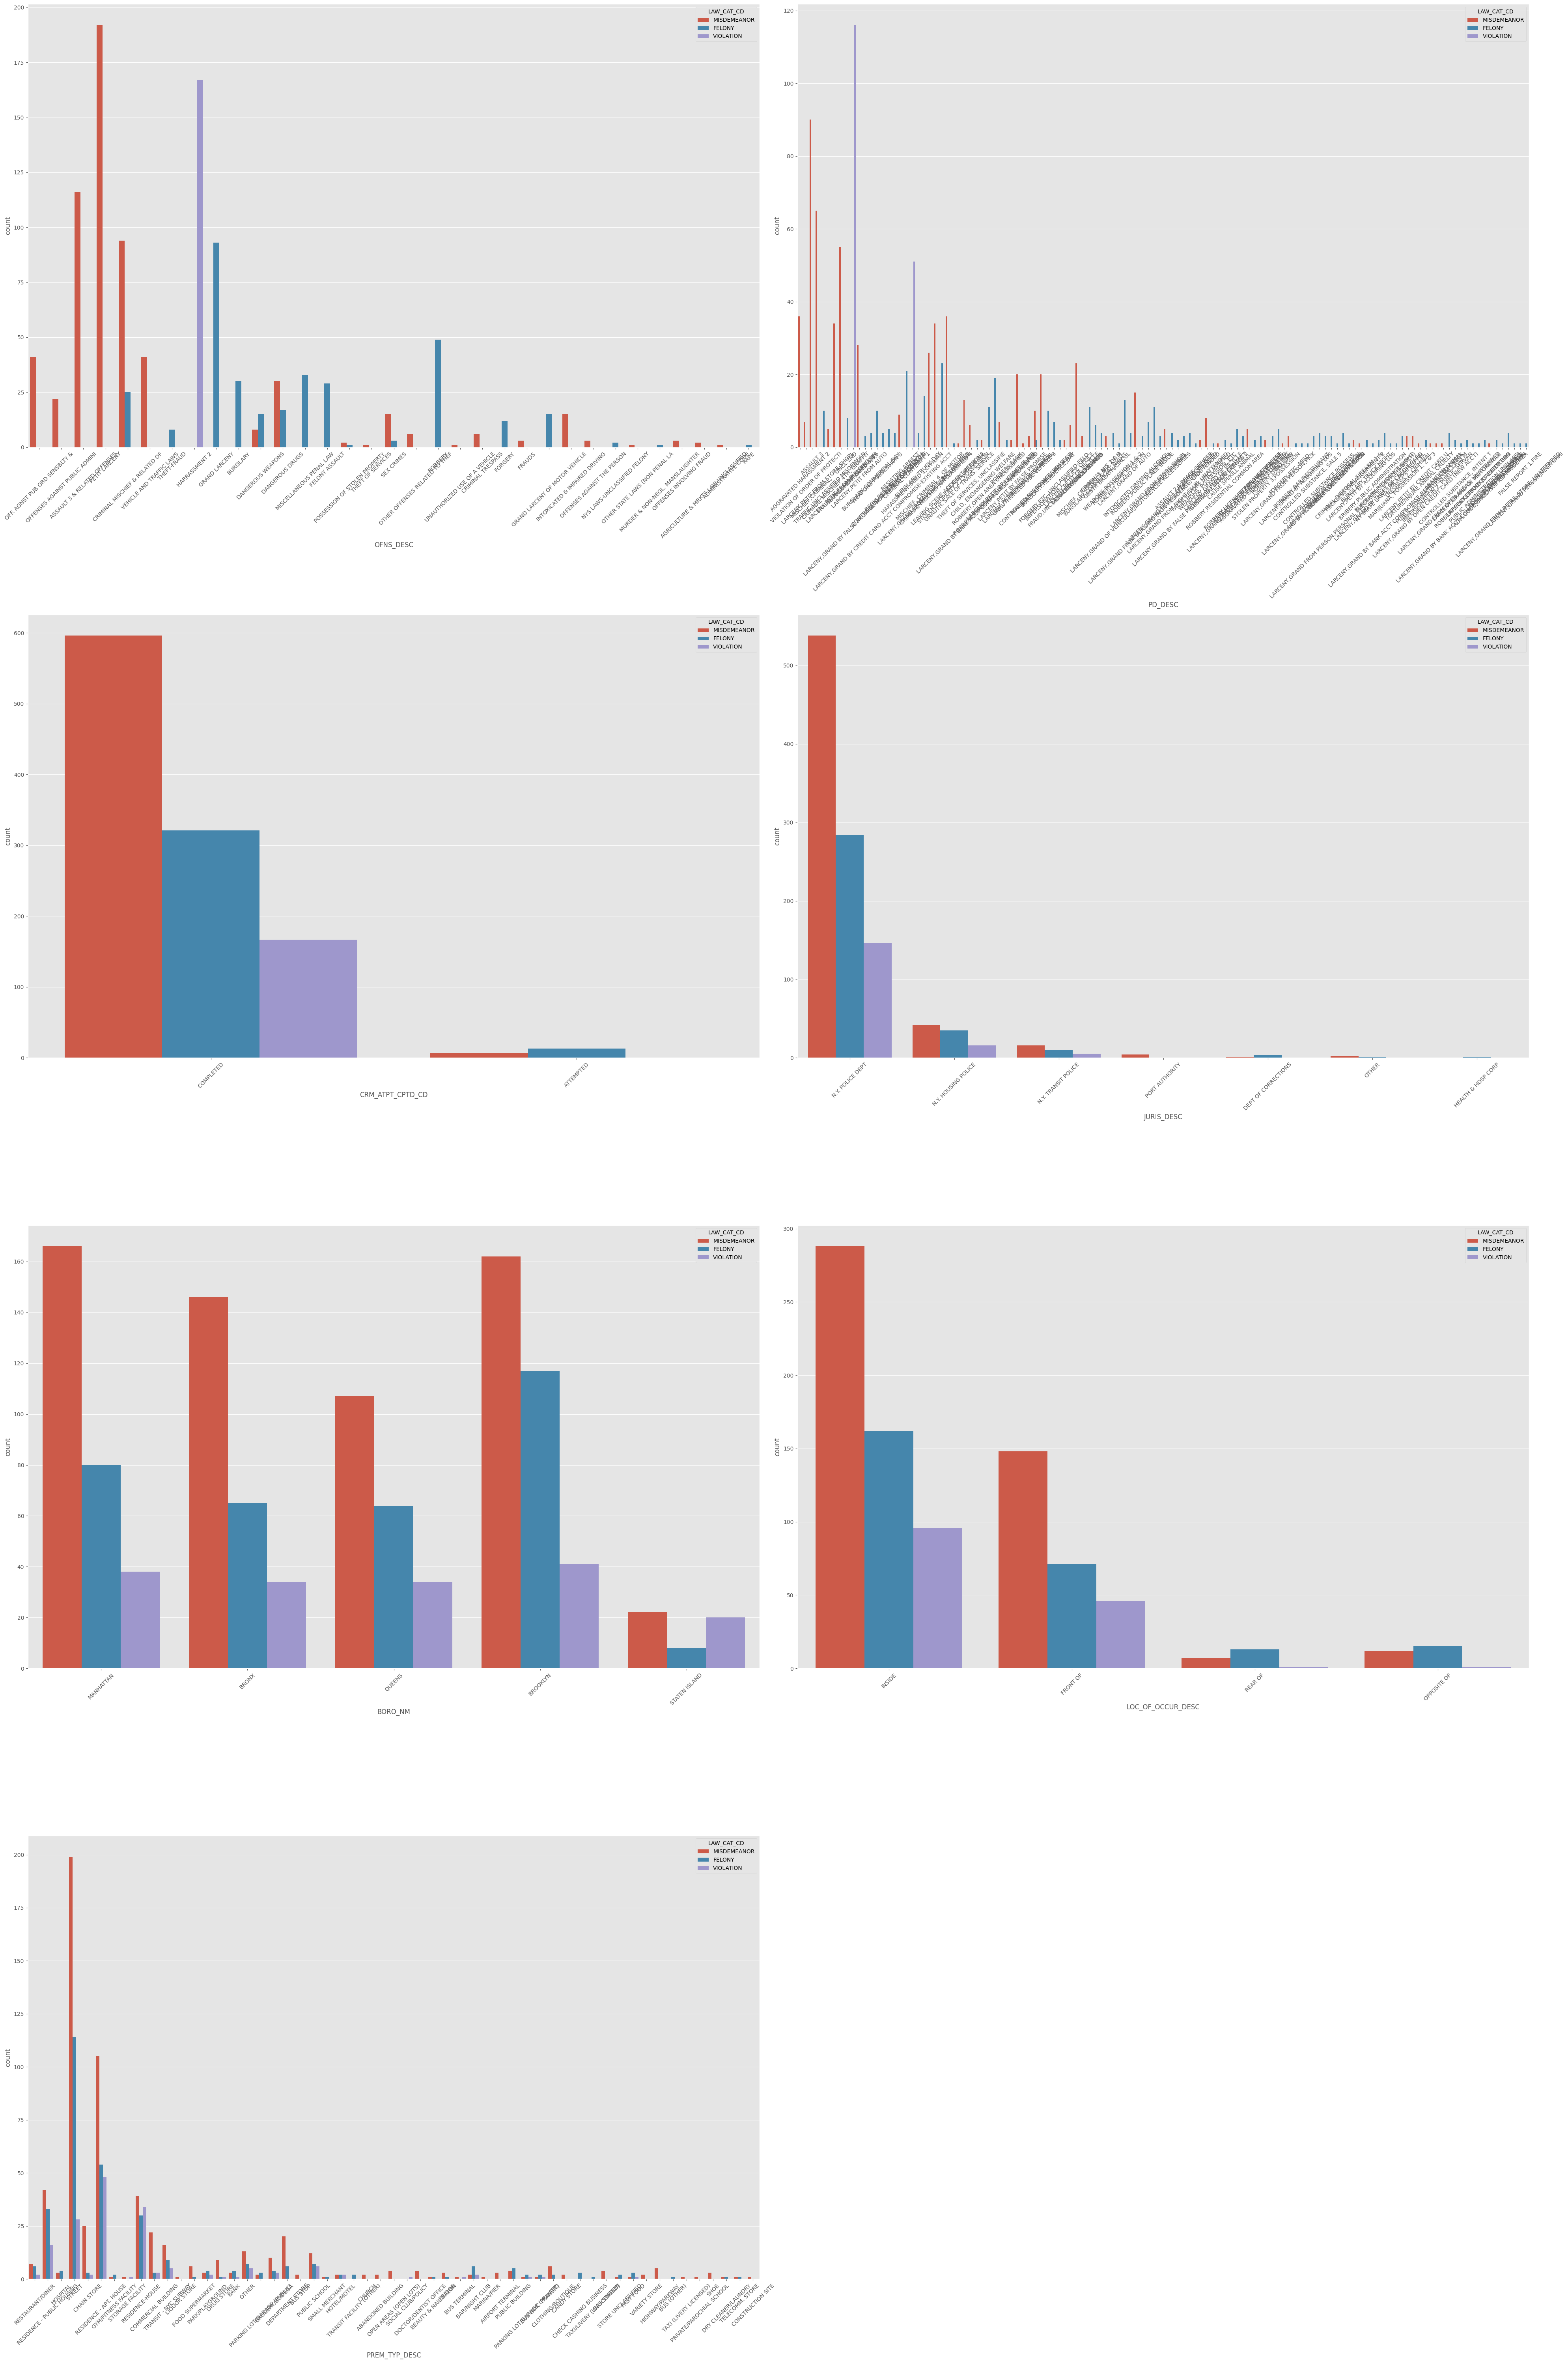

In [22]:
# Listar las columnas categóricas
cat_cols = X.select_dtypes(include=['object']).columns.to_list()

# Concatenar X e y para análisis
X_y = pd.concat([X, y], axis=1)

# Calcular el número de filas y columnas necesarias
num_plots = len(cat_cols)
num_cols = 2  # Definimos 3 columnas para que los gráficos se ajusten bien
num_rows = (num_plots + num_cols - 1) // num_cols  # Esto asegura que se ajuste el número de filas

# Crear subplots
_, ax = plt.subplots(num_rows, num_cols, figsize=(40, 60))

# Aplanar la matriz de ejes para facilitar la indexación
ax = ax.flatten()

# Generar los gráficos
for i, col in enumerate(cat_cols):
    sns.countplot(data=X_y, x=col, ax=ax[i], hue='LAW_CAT_CD')
    ax[i].tick_params(axis='x', rotation=45)  # Rotar las etiquetas del eje X

# Eliminar cualquier subplot vacío si los hay
for j in range(i + 1, len(ax)):
    ax[j].remove()

plt.tight_layout()
plt.show()

## Variable objetivo

La variable LAW_CAT_CD se elige como objetivo debido a su relevancia en el análisis de delitos, permitiendo clasificar y predecir el tipo de delito (FELONY, MISDEMEANOR, VIOLATION) basado en otras características del dataset. Su naturaleza categórica es adecuada para técnicas de clasificación, y la distribución de las clases muestra un equilibrio suficiente para entrenar modelos robustos. Además, el análisis de esta variable en combinación con otras características del dataset asegura que se dispone de datos relevantes para la construcción de modelos predictivos efectivos, contribuyendo a la mejora de la seguridad pública y la eficiencia en la aplicación de la ley.

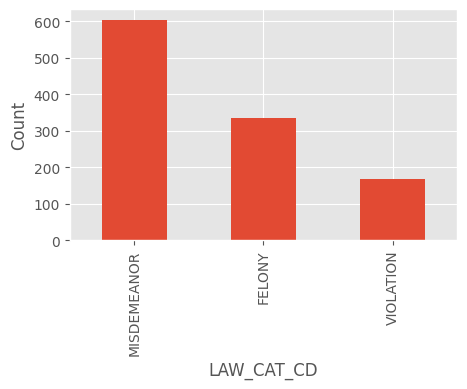

In [23]:
y.value_counts().plot.bar(figsize=(5, 3))

plt.xlabel("LAW_CAT_CD")
plt.ylabel("Count")
plt.show()

## Preparación para la clasificación

 Se eliminan las filas que contienen valores faltantes (NaN).

In [24]:
import pandas as pd

# Suponiendo que tus datos están en un DataFrame llamado X y una Serie llamada y

# Combinar X e y para asegurarse de que las mismas filas se eliminen en ambos
X_y_combined = pd.concat([X, y], axis=1)

# Eliminar las filas con NaN en cualquier columna
X_y_combined_clean = X_y_combined.dropna()

# Separar X e y nuevamente
X_clean = X_y_combined_clean.drop(columns=y.name)
y_clean = X_y_combined_clean[y.name]

# Verificar que se eliminaron correctamente
print(X_clean.info())
print(y_clean.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 845 entries, 0 to 1103
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   KY_CD              845 non-null    int64  
 1   OFNS_DESC          845 non-null    object 
 2   PD_CD              845 non-null    float64
 3   PD_DESC            845 non-null    object 
 4   CRM_ATPT_CPTD_CD   845 non-null    object 
 5   JURIS_DESC         845 non-null    object 
 6   BORO_NM            845 non-null    object 
 7   ADDR_PCT_CD        845 non-null    int64  
 8   LOC_OF_OCCUR_DESC  845 non-null    object 
 9   PREM_TYP_DESC      845 non-null    object 
 10  X_COORD_CD         845 non-null    float64
 11  Y_COORD_CD         845 non-null    float64
 12  Latitude           845 non-null    float64
 13  Longitude          845 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 99.0+ KB
None
(845,)


#### Encoding de las variables que lo necesiten

Se realiza la codificación de variables categóricas en el dataset X_clean utilizando ColumnTransformer y OrdinalEncoder de sklearn. Primero, se especifican las columnas categóricas que se desean codificar en la lista categorical_cols. Luego, se crea un ColumnTransformer llamado ColTransformer que tiene dos transformadores: el primero ("cat_data_encoding") utiliza OrdinalEncoder para transformar las columnas categóricas en valores numéricos, mientras que el segundo ("other_data") permite que las columnas restantes (que no son categóricas) pasen sin cambios mediante la opción "passthrough". Finalmente, se aplica esta transformación al dataset X_clean, obteniendo un nuevo conjunto de datos codificado (X_encoded) que contiene tanto las variables categóricas transformadas como las demás variables sin cambios.


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ["CRM_ATPT_CPTD_CD", "BORO_NM", "LOC_OF_OCCUR_DESC","PREM_TYP_DESC", "KY_CD", "OFNS_DESC", "PD_CD", "PD_DESC", "JURIS_DESC"]

ColTransformer = ColumnTransformer(
    transformers = [
            ("cat_data_encoding", OrdinalEncoder(), categorical_cols),
            ("other_data", "passthrough", X_clean.columns.difference(categorical_cols))
    ],
    verbose_feature_names_out = False
)

X_encoded = ColTransformer.fit_transform(X_clean)

X_encoded

array([[ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00, ...,
        -7.39862853e+01,  9.88050000e+05,  2.14940000e+05],
       [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00, ...,
        -7.39426405e+01,  1.00012600e+06,  2.38706000e+05],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -7.38915365e+01,  1.01425600e+06,  2.50228000e+05],
       ...,
       [ 1.00000000e+00,  2.00000000e+00,  1.00000000e+00, ...,
        -7.39738376e+01,  9.91495000e+05,  2.26842000e+05],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -7.39390959e+01,  1.00113900e+06,  1.92775000e+05],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -7.39954550e+01,  9.85512000e+05,  1.68211000e+05]])

### Selección de características para la clasificación

#### Matriz de correlaciones para variables categoricas

para establecer una correlacion entre las variables categoricas es preferible usar la correlacion de CramersV, este valor se mueve entre `[0, 1]`, siendo valores cercanos a 1 que las dos variables estan correlacionadas y valores cercanos a 0 que no lo estan

In [26]:
def cramers_V(df):
    def get_cramersV_corr(var1, var2):
        from scipy.stats import chi2_contingency
        crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
        stat = chi2_contingency(crosstab)[0]
        obs = np.sum(crosstab)
        mini = min(crosstab.shape) - 1
        return (stat/(obs*mini))


    rows= []
    for var1 in df.columns:
        col = []
        for var2 in df.columns:
            cramers = get_cramersV_corr(df[var1], df[var2])
            col.append(round(cramers,2))
        rows.append(col)

    return pd.DataFrame(rows, columns=df.columns, index=df.columns)

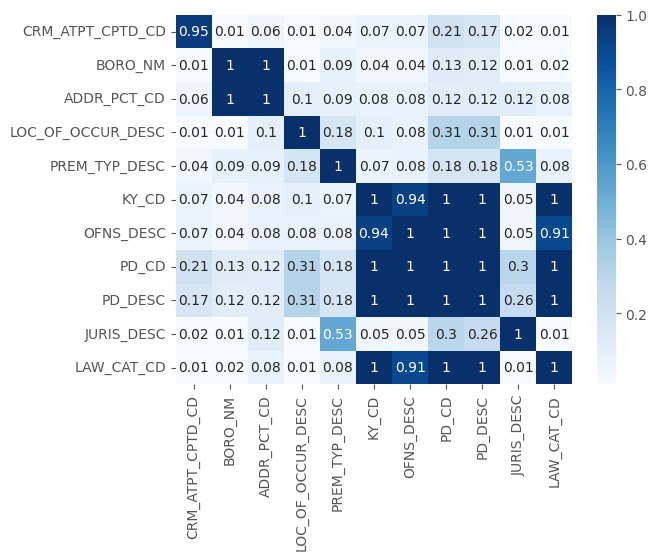

In [27]:
categorical_cols = [ "CRM_ATPT_CPTD_CD", "BORO_NM", "ADDR_PCT_CD", "LOC_OF_OCCUR_DESC","PREM_TYP_DESC", "KY_CD", "OFNS_DESC", "PD_CD", "PD_DESC", "JURIS_DESC", "LAW_CAT_CD"]

sns.heatmap( cramers_V(X_y[categorical_cols]) , annot=True, cmap="Blues")

plt.xticks(rotation=90)
plt.show()

#### matriz de correlaciones para variables numericas

para establecer una correlacion **lineal** entre las variables numericas usaremos la correlacion de Pearson, este valor se mueve entre `[-1, 1]`, siendo valores cercanos a 1 o -1 que las dos variables estan correlacionadas y valores cercanos a 0 que no lo estan

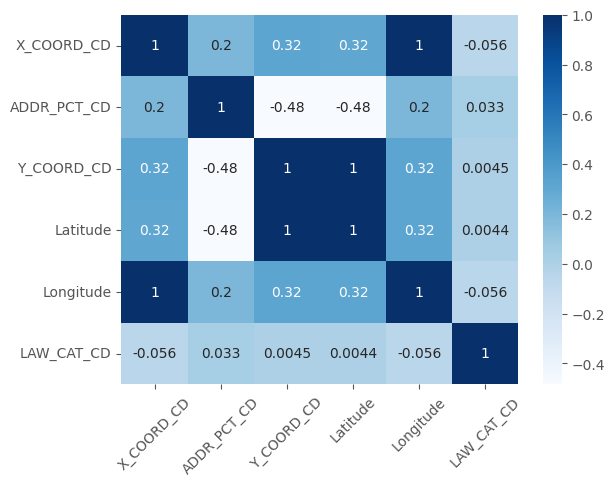

In [28]:
from sklearn.preprocessing import OrdinalEncoder

# Convertir la columna OFNS_DESC a numérica
encoder = OrdinalEncoder()

X_y_cod = X_y.copy()

# Convertir la columna y devolverla como un DataFrame
X_y_cod['LAW_CAT_CD'] = encoder.fit_transform(X_y[['LAW_CAT_CD']])

numerical_cols = ['X_COORD_CD', "ADDR_PCT_CD", 'Y_COORD_CD', 'Latitude', "Longitude", "LAW_CAT_CD"]

# Crear el heatmap de correlación
sns.heatmap(X_y_cod[numerical_cols].corr(), annot=True, cmap="Blues")

plt.xticks(rotation=45)
plt.show()

#### SelectKBest

Selecciona las K caracteristicas que mas peso tienen en la clasificacion (basado en una funcion de scoring, por defecto `f_classif`)

In [29]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(k="all").fit(X_encoded, y_clean)

pd.Series(data=kbest.scores_, index=ColTransformer.get_feature_names_out()).sort_values(ascending=False)

,0
KY_CD,2808.940131
PD_CD,149.666714
PD_DESC,17.314870
ADDR_PCT_CD,8.023204
PREM_TYP_DESC,6.394099
OFNS_DESC,6.296391
LOC_OF_OCCUR_DESC,5.829778
BORO_NM,4.665719
Latitude,4.468881
Y_COORD_CD,4.466059


Se seleccionan las 4 mejores características basadas en las puntuaciones obtenidas y se crea un nuevo DataFrame que contiene solo estas características. Las características seleccionadas y sus respectivas puntuaciones son:

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif  # Asegúrate de que el método de puntuación sea apropiado

# Selecciona las 4 mejores características
kbest = SelectKBest(k=4).fit(X_encoded, y_clean)

# Obtén los nombres de las columnas seleccionadas
selected_features = kbest.get_support(indices=True)
selected_feature_names = ColTransformer.get_feature_names_out()[selected_features]

# Filtra el DataFrame original para conservar solo las columnas seleccionadas
X_selected_df = pd.DataFrame(X_encoded[:, selected_features], columns=selected_feature_names)

# Muestra el nuevo DataFrame
print(X_selected_df)

# Obtén las puntuaciones de las características seleccionadas
selected_scores = kbest.scores_[selected_features]

# Crea una Serie con los nombres de las columnas seleccionadas y sus puntuaciones, ordenada de mayor a menor
selected_series = pd.Series(data=selected_scores, index=selected_feature_names).sort_values(ascending=False)

# Muestra las 4 mejores características con sus puntuaciones
print(selected_series)


     KY_CD  PD_CD  PD_DESC  ADDR_PCT_CD
0     27.0   84.0      3.0         14.0
1     27.0   84.0      3.0         32.0
2     26.0   96.0    108.0         48.0
3     18.0    0.0      6.0        110.0
4     16.0   29.0     69.0        114.0
..     ...    ...      ...          ...
840   30.0   83.0     34.0         33.0
841   11.0    9.0     20.0         67.0
842    2.0   14.0      9.0         24.0
843   11.0    9.0     20.0         79.0
844   30.0   83.0     34.0         66.0

[845 rows x 4 columns]
KY_CD          2808.940131
PD_CD           149.666714
PD_DESC          17.314870
ADDR_PCT_CD       8.023204
dtype: float64


In [32]:
# Convierte el DataFrame a un numpy.ndarray
X_selected_array = X_selected_df.to_numpy()

print(type(X_selected_array))

<class 'numpy.ndarray'>


#### Separar los datos en entrenamiento y prueba

para esto usaremos `train_test_split` de la libreria `sklearn.model_selection`

dependiendo de la cantidad de datos que se tengan puede ser recomendable usar mas o menos datos para el entrenamiento, pueden probar con diferentes valores para `train_size` y ver como cambia el resultado

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected_array, y_clean, train_size=.75)

#### Evaluación de parámetros del modelo

usaremas `GridSearchCV` de la libreria `sklearn.model_selection` para evaluar los parametros del modelo

In [71]:
from collections import Counter

# Contar la cantidad de muestras en cada clase en y_train
class_counts = Counter(y_train)

# Calcular el peso de cada clase como el inverso de su frecuencia relativa
class_weight_dict = {cls: 346/count for cls, count in class_counts.items()}
print(class_counts)
print(class_weight_dict)

Counter({'MISDEMEANOR': 346, 'FELONY': 183, 'VIOLATION': 104})
{'FELONY': 1.8907103825136613, 'MISDEMEANOR': 1.0, 'VIOLATION': 3.326923076923077}


## Gini o Entropy

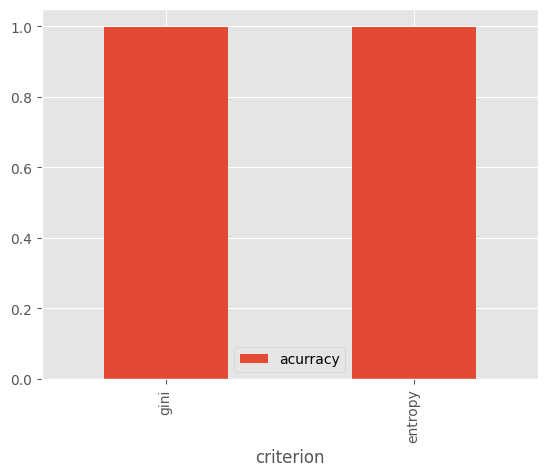

In [72]:
# evaluar criterion
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid = {"criterion": ["gini", "entropy"]}

criterion_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight=class_weight_dict),
    param_grid = grid
)
criterion_model.fit(X_train, y_train)


df_results = pd.DataFrame(criterion_model.cv_results_["params"])
df_results["acurracy"] = criterion_model.cv_results_["mean_test_score"]

df_results.plot.bar(x="criterion", y="acurracy")

plt.show()

En el análisis, se compararon ambos criterios utilizando GridSearchCV para encontrar el mejor parámetro para el modelo de árbol de decisión. Los resultados mostraron que el criterio gini obtuvo una mejor puntuación media en la validación cruzada en comparación con entropy. Esto sugiere que, en este caso específico, el criterio de Gini proporcionó un rendimiento superior al criterio de Entropía en la clasificación de los datos, lo que llevó a la elección de gini como el criterio óptimo para la construcción del árbol de decisión.

## Altura del arbol

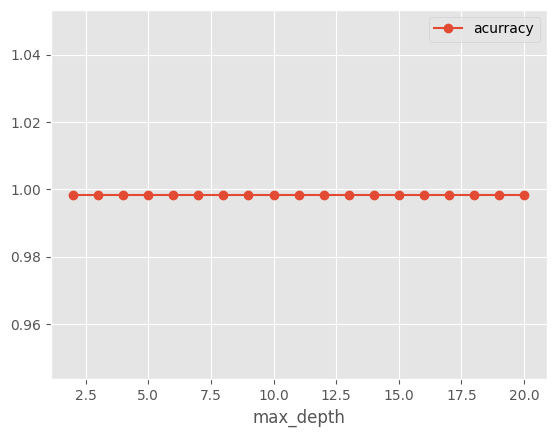

In [73]:
# evaluar altura del arbol
grid = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
max_depth_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight=class_weight_dict),
    param_grid = grid
)
max_depth_model.fit(X_train, y_train)


df_results = pd.DataFrame(max_depth_model.cv_results_["params"])
df_results["acurracy"] = max_depth_model.cv_results_["mean_test_score"]

df_results.plot.line(x="max_depth", y="acurracy", marker="o")

plt.show()

En el análisis, se probaron diversas profundidades para encontrar el equilibrio óptimo entre sesgo y varianza. Los resultados, visualizados en el gráfico de líneas, muestran cómo la precisión media de validación cruzada no parece cambiar con la profundidad del árbol, por esto, se observó que una profundidad máxima de 2 proporcionó la mejor precisión promedio ya que ofreció el mejor equilibrio entre la capacidad de generalización y la precisión del modelo en los datos de validación. Por lo tanto, se eligió una profundidad máxima de 2 para el árbol de decisión, ya que fue el valor que optimizó el rendimiento del modelo en la tarea de clasificación.

In [74]:
# evaluar todas a la vez

grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
}

# Calculate class weights based on y_train
unique_classes = y_train.unique()

all_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight=class_weight_dict),
    param_grid = grid
)
all_model.fit(X_train, y_train)

display(
    "mejores parametros",
    all_model.best_params_,
    "",
    "mejor accurracy",
    all_model.best_score_
)

'mejores parametros'

{'criterion': 'gini', 'max_depth': 2}

''

'mejor accurracy'

0.9984251968503937

#### Resultados obtenidos

Los mejores hiperparámetros encontrados y la mejor precisión (accuracy) obtenida:

* Mejores parametros: {'criterion': 'gini', 'max_depth': 2}: Indica que la mejor configuración para este modelo fue utilizar el criterio "gini" y una profundidad máxima de 2 niveles en el árbol de decisión.
* Mejor accurracy: 0.9984: Muestra que esta configuración del modelo obtuvo una precisión muy alta en el conjunto de entrenamiento, cercana al 99.84%.

#### Análisis de resultado

Una precisión del 99.84% en el conjunto de entrenamiento significa que el modelo de árbol de decisión clasificó correctamente el 99.84% de las instancias en los datos de entrenamiento. En otras palabras, solo el 0.16% de las predicciones fueron incorrectas. Esta alta precisión indica que el modelo se desempeña extremadamente bien en los datos con los que se entrenó.

## DT

### Entrenamieto del modelo

In [75]:
# entrenar con los mejores hiperparametros

modelo = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,
    class_weight=class_weight_dict
)

modelo = modelo.fit(X_train, y_train)

In [57]:
modelo

DecisionTreeClassifier(class_weight={'FELONY': 1.6515151515151516,
                                     'MISDEMEANOR': 1.0,
                                     'VIOLATION': 3.0277777777777777},
                       max_depth=2)

In [76]:
# mostrar imagen del arbol
def Mostrar_Arbol(modelo, nombres_caract):
    from sklearn.tree import export_graphviz
    from subprocess import check_call
    from PIL import Image, ImageDraw, ImageFont
    from IPython.display import Image as PImage

    with open(r"tree1.dot", 'w') as f:
        f = export_graphviz(modelo,
                            out_file=f,
                            max_depth = 4,
                            impurity = True,
                            feature_names = nombres_caract,
                            class_names = list(map(str, modelo.classes_)),
                            rounded = True,
                            filled= True)

    # Convertir el archivo .dot a png para poder visualizarlo
    check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
    return PImage("tree1.png")

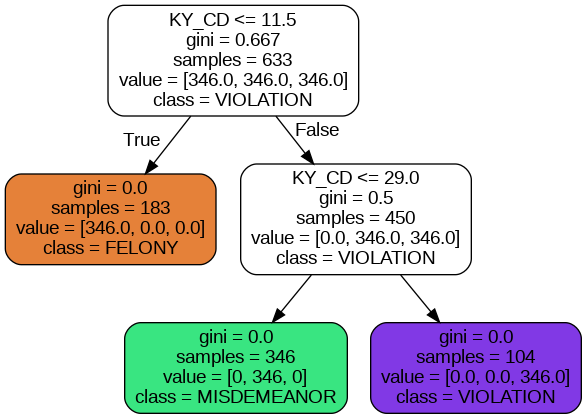

In [77]:
nombres_caract_originales = X_selected_df.columns

Mostrar_Arbol(modelo, nombres_caract_originales)

## GNB

#### **IMPLEMENTACIÓN** (Naive Bayes Gaussiano)

In [78]:
import numpy as np

class NaiveBayes:

    def fit(self, X, y):
        n_instancias, n_caracteristicas = X.shape
        self._clases = np.unique(y)
        n_clases = len(self._clases)

        # Calculamos la media, la varianza y el prior para cada clase
        self._media = np.zeros((n_clases, n_caracteristicas), dtype=np.float64)
        self._varianza = np.zeros((n_clases, n_caracteristicas), dtype=np.float64)
        self._priors = np.zeros(n_clases, dtype=np.float64)

        # Llenamos los arreglos
        for i, c in enumerate(self._clases):
            X_c = X[y == c]  # Seleccionamos la clase que necesitemos
            self._media[i, :] = X_c.mean(axis=0)  # Media para cada característica
            self._varianza[i, :] = X_c.var(axis=0)  # Varianza para cada característica
            self._priors[i] = X_c.shape[0] / float(n_instancias)  # Prior de la clase

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]  # List comprehension con las predicciones
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # Calculamos el posterior para cada clase
        for i, c in enumerate(self._clases):
            prior2 = np.log(self._priors[i])
            posterior = np.sum(np.log(self._pdf(i, x)))
            posterior = posterior + prior2
            posteriors.append(posterior)

        # Retornamos la clase con el posterior máximo
        return self._clases[np.argmax(posteriors)]

    def _pdf(self, clase_i, x):
        media = self._media[clase_i]
        varianza = self._varianza[clase_i]

        # Añadimos un pequeño valor para evitar división por cero
        varianza[varianza == 0] += 1e-9

        numerador = np.exp(-((x - media) ** 2) / (2 * varianza))
        denominador = np.sqrt(2 * np.pi * varianza)
        return numerador / denominador


Ahora veamos qué tal funciona nuestra implementación con una métrica de exactitud "accuracy":

In [79]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

nb = NaiveBayes()
nb.fit(X_train, y_train)
predicciones = nb.predict(X_test)

print(accuracy(y_test, predicciones))

0.9575471698113207


<ipython-input-78-eddef03dc52c>:32: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(i, x)))


Repliquemos el experimento con el algoritmo de Naive Bayes Gaussiano de Scikit-learn:

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy(y_test, y_pred)

0.9575471698113207

La precisión obtenida con el clasificador Naive Bayes es 95.75%, lo que indica que el modelo ha clasificado correctamente aproximadamente el 95.7% de las instancias en el conjunto de prueba. Este valor es bastante alto, lo que sugiere que el modelo Naive Bayes también está funcionando muy bien para este conjunto de datos en particular.

## Métricas del DT y el GNB

In [68]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

print("Metricas para datos de entrenamiento DT")
print(classification_report(y_train, modelo.predict(X_train)))

print("//////////////////////////////////////////////////////")

print("Metricas para datos de prueba DT")
print(classification_report(y_test, modelo.predict(X_test)))


y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Imprimir las métricas para los datos de entrenamiento
print("Métricas para datos de entrenamiento GNB")
print(classification_report(y_train, y_train_pred))

print("//////////////////////////////////////////////////////")

# Imprimir las métricas para los datos de prueba
print("Métricas para datos de prueba GNB")
print(classification_report(y_test, y_test_pred))


print("Exactitud para el entrenamiento DT =", modelo.score(X_train, y_train))
print("Exactitud para prueba DT =", modelo.score(X_test, y_test))

# Calculamos la exactitud para los datos de entrenamiento
train_accuracy = accuracy_score(y_train, gnb.predict(X_train))
print("Exactitud para el entrenamiento GNB:", train_accuracy)

# Calculamos la exactitud para los datos de prueba
test_accuracy = accuracy_score(y_test, gnb.predict(X_test))
print("Exactitud para prueba GNB:", test_accuracy)

Metricas para datos de entrenamiento DT
              precision    recall  f1-score   support

      FELONY       1.00      1.00      1.00       198
 MISDEMEANOR       1.00      1.00      1.00       327
   VIOLATION       1.00      1.00      1.00       108

    accuracy                           1.00       633
   macro avg       1.00      1.00      1.00       633
weighted avg       1.00      1.00      1.00       633

//////////////////////////////////////////////////////
Metricas para datos de prueba DT
              precision    recall  f1-score   support

      FELONY       1.00      1.00      1.00        57
 MISDEMEANOR       1.00      1.00      1.00       120
   VIOLATION       1.00      1.00      1.00        35

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

Métricas para datos de entrenamiento GNB
              precision    recall  f1-score   support

      FELONY  

### Comparación entre DT y GNB:

* Árbol de Decisión: Ofrece un rendimiento perfecto en todas las métricas para ambos conjuntos de datos. Esto podría ser una señal de sobreajuste si el modelo está demasiado ajustado a los datos de entrenamiento.

* Naive Bayes: Aunque no alcanza el rendimiento perfecto del árbol de decisión, aún proporciona una alta precisión y recall en la mayoría de las clases. Las métricas son ligeramente inferiores en comparación con el árbol de decisión, lo que es esperado ya que Naive Bayes es un modelo más simple en comparación con los árboles de decisión.

## Conclusión

Ambos modelos tienen un muy buen rendimiento, pero el árbol de decisión ha logrado una exactitud del 100% en ambos conjuntos de datos, mientras que Naive Bayes tiene una exactitud ligeramente menor pero aún alta. La elección entre modelos puede depender de la interpretación del dominio y la necesidad de manejar el sobreajuste, ya que mientras que el árbol de decisión muestra una exactitud perfecta en ambos conjuntos de datos, es importante considerar el riesgo de sobreajuste y la capacidad del modelo para generalizar. El modelo Naive Bayes, aunque ligeramente menos preciso, puede ofrecer ventajas en términos de robustez y eficiencia. La elección final entre estos modelos debería basarse en un balance entre precisión, interpretabilidad, y cómo el modelo se ajusta a los requisitos específicos del problema y del entorno de implementación.